### Vamos seguir as etapas do Machine Learning Workflow

In [119]:
from IPython.display import Image

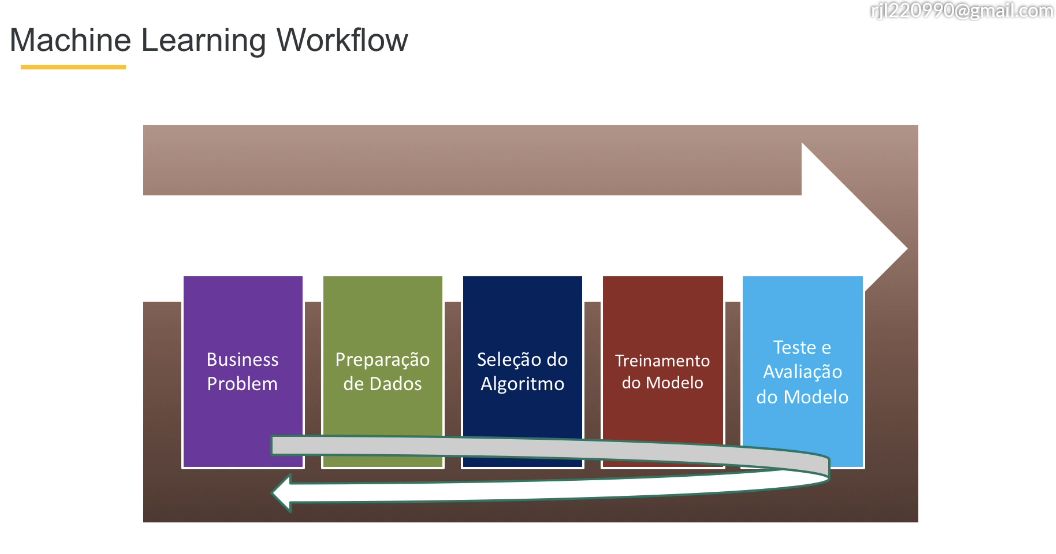

In [4]:
Image('img/Machine Learning Workflow.png')

### Conjunto de dados do Repositorio de ML da UCI/Kaggle
https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [12]:
df = pd.read_csv('dataset/pima-data.csv')

In [13]:
df.shape

(768, 10)

In [14]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [35]:
df.isnull().values.any()

False

In [36]:
df.tail()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


#### verificar a correlação entre as varivaeis pra assim tomar decisão sobre as que precisam ser mantidas

In [17]:
# Identificando a correlação entre as variaveis
# Lembre-se, correlação nao implica causalidade

In [30]:
def plot_corr(df, size=10):
    c = df.corr()
    fig, ax = plt.subplots(figsize = (size,size))
    ax.matshow(c)
    plt.xticks(range(len(c.columns)), c.columns)
    plt.yticks(range(len(c.columns)), c.columns)
    

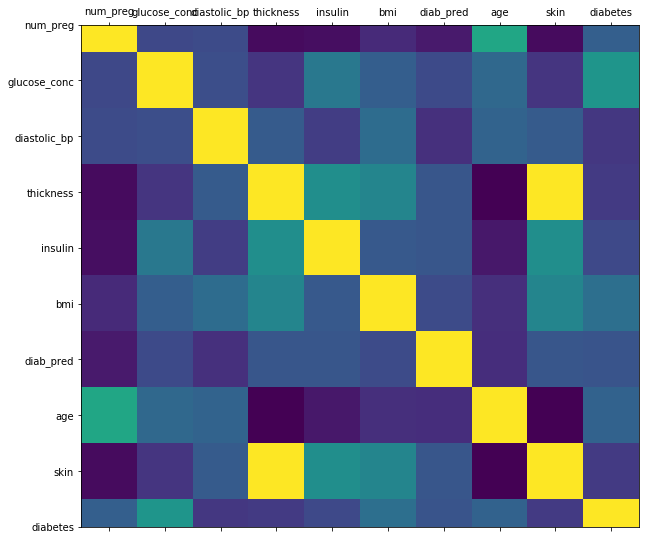

In [31]:
plot_corr(df)

In [ ]:
#Interpretando a correlação entre as variáveis
# Coeficiente de Correlação:
# +1 -> forte correlação positiva (amarelo)
# 0 -> não há correlação (Tudo que é diferente da correlação positiva e negativa)
# -1 -> forte correlação negativa (azul escuro)

In [33]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [37]:
#Dewfinindo as classes
diabetes_map = {True: 1, False: 0}

In [39]:
#Aplicando o mapeamento dos diabéticos
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [40]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [50]:
#Verificar como os dados estão distribuidos e ver se precisa normalizar
n_true = len(df.loc[df['diabetes'] == True])
n_false = len(df.loc[df['diabetes'] == False])
print('Numero de casos verdadeiros: {0} ({1:2.2f}%)'.format(n_true, (n_true / (n_true+n_false))*100))
print('Numero de casos Falsos: {0} ({1:2.2f}%)'.format(n_false, (n_false / (n_true+n_false))*100))

Numero de casos verdadeiros: 268 (34.90%)
Numero de casos Falsos: 500 (65.10%)


### Dividindo os dados em conjunto de treino e conjunto de teste
70% para treino e 30% para teste

In [45]:
from sklearn.model_selection import train_test_split

In [51]:
#Seleção de variaveis (Features selection)
atributos = ['num_preg', 'glucose_conc','diastolic_bp','thickness','insulin','bmi','diab_pred','age']

In [52]:
#variavel a ser prevista
attrib_prev = ['diabetes']

In [53]:
#Criando objetos
X = df[atributos].values
Y = df[attrib_prev].values

In [56]:
#X

In [57]:
#Y

In [59]:
# Definindop a taxa de split
split_test_size = 0.30

In [60]:
#Criando dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = split_test_size, random_state=42 )

In [62]:
# Resultado sa separação dos dados
print('{0:0.2f}% nos dados de treino'.format((len(X_treino)/len(df.index))*100))
print('{0:0.2f}% nos dados de teste'.format((len(X_teste)/len(df.index))*100))

69.92% nos dados de treino
30.08% nos dados de teste


In [64]:
X_treino

array([[  1.   ,  95.   ,  60.   , ...,  23.9  ,   0.26 ,  22.   ],
       [  5.   , 105.   ,  72.   , ...,  36.9  ,   0.159,  28.   ],
       [  0.   , 135.   ,  68.   , ...,  42.3  ,   0.365,  24.   ],
       ...,
       [ 10.   , 101.   ,  86.   , ...,  45.6  ,   1.136,  38.   ],
       [  0.   , 141.   ,   0.   , ...,  42.4  ,   0.205,  29.   ],
       [  0.   , 125.   ,  96.   , ...,  22.5  ,   0.262,  21.   ]])

### Verificando Split

In [76]:
#Dados original
print('Original True : {0} ({1:0.2f}%)'.format(len(df.loc[df['diabetes'] == 1]), (len(df.loc[df['diabetes'] == 1])/ len(df.index)* 100)))
print('Original True : {0} ({1:0.2f}%)'.format(len(df.loc[df['diabetes'] == 0]), (len(df.loc[df['diabetes'] == 0])/ len(df.index)* 100)))

#Training Data
print('Training True : {0} ({1:0.2f}%)'.format(len(Y_treino[Y_treino[:]==1]), (len(Y_treino[Y_treino[:]==1])/ len(Y_treino)* 100)))
print('Training False : {0} ({1:0.2f}%)'.format(len(Y_treino[Y_treino[:]==0]), (len(Y_treino[Y_treino[:]==0])/ len(Y_treino)* 100)))

#Training Test
print('Teste True : {0} ({1:0.2f}%)'.format(len(Y_teste[Y_teste[:]==1]), (len(Y_treino[Y_teste[:]==1])/ len(Y_teste)* 100)))
print('Test False : {0} ({1:0.2f}%)'.format(len(Y_teste[Y_teste[:]==0]), (len(Y_treino[Y_teste[:]==0])/ len(Y_teste)* 100)))

Original True : 268 (34.90%)
Original True : 500 (65.10%)
Training True : 188 (35.01%)
Training False : 349 (64.99%)


IndexError: boolean index did not match indexed array along dimension 0; dimension is 537 but corresponding boolean dimension is 231

In [77]:
#O ideal seria fazer balanceamento

### Valores Missing Ocultos
Vamos verificar nosso dataset pra ver valores missing e entender melhor

In [78]:
df.isnull().values.any()

False

In [79]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [86]:
# verfificamos as colunas com zero se na verdade é um valor missing
# Obs: na coluna {insulin} temos os valores zeros (0) que provavelmente pode ser um valor missing
## Importante: chamamos isso de valores missing oculto, valor que nao chega a faltar, mas que nao é um valor que corresponda ao q deveria ser o valor da variavel 

In [89]:
print('> Linhas no dataframe {0}'.format(len(df)))

print('> Linhas missing glucose_conc: {0} '.format(len(df.loc[df['glucose_conc']== 0])))
print('> Linhas missing diastolic_bp: {0} '.format(len(df.loc[df['diastolic_bp']== 0])))
print('> Linhas missing thickness: {0} '.format(len(df.loc[df['thickness']== 0])))
print('> Linhas missing insulin: {0} '.format(len(df.loc[df['insulin']== 0])))
print('> Linhas missing bmi: {0} '.format(len(df.loc[df['bmi']== 0])))
print('> Linhas missing age: {0} '.format(len(df.loc[df['age']== 0])))


> Linhas no dataframe 768
> Linhas missing glucose_conc: 5 
> Linhas missing diastolic_bp: 35 
> Linhas missing thickness: 227 
> Linhas missing insulin: 374 
> Linhas missing bmi: 11 
> Linhas missing age: 0 


### Tratando Dados Missing - Impute
Substituindo os valores iguais a zero pela média dos dados

In [104]:
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer

In [105]:
# Criando Objeto
preenche_zero = SimpleImputer(missing_values = 0, strategy = 'mean')

# Substituindo os valores iguais a zero pela média dos dados
X_treino = preenche_zero.fit_transform(X_treino)
X_teste = preenche_zero.fit_transform(X_teste)

### 50 a 80% do tempo de trabalho de um Cientista de Dados é usado na preparação dos dados
### Construindo e treinando o modelo

In [107]:
#Utilizar o classificador Naive Bayes
from sklearn.naive_bayes import GaussianNB

### Naive Bayes é um algoritmo de classificação 
Um Algoritmo probabilístico

In [108]:

# Craindo o modelo preditivo 
modelo_v1 = GaussianNB()

In [109]:
#Treinando o modelo
modelo_v1.fit(X_treino, Y_treino.ravel()) # função ravel é pra ajustar shape

GaussianNB(priors=None, var_smoothing=1e-09)

### Verificar a exatidão do modelo nos dados de treino

In [111]:
from sklearn import metrics

In [115]:
nb_predict_train = modelo_v1.predict(X_treino)
print('Exatidão (Accuracy): {0:.4f}'.format(metrics.accuracy_score(Y_treino, nb_predict_train)))
print()

Exatidão (Accuracy): 0.7542



### Verificar a exatidão do modelo nos dados de teste

In [117]:
print('Exatidão (Accuracy): {0:.4f}'.format(metrics.accuracy_score(Y_teste, modelo_v1.predict(X_teste))))
print()

Exatidão (Accuracy): 0.7359



### Métricas

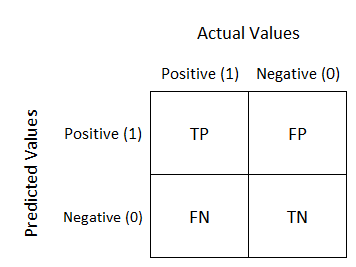

In [120]:
#from Ipython.display import Image

Image('img/Confusion Matrix.png')

In [123]:
### Criamos uma confusion matrix
print('Matriz de Confusão')

print('{0}'.format(metrics.confusion_matrix(Y_teste, modelo_v1.predict(X_teste), labels =[1, 0])))
print()

print('Classification Report')
print('{0}'.format(metrics.classification_report(Y_teste, modelo_v1.predict(X_teste), labels =[1, 0])))

Matriz de Confusão
[[ 52  28]
 [ 33 118]]

Classification Report
              precision    recall  f1-score   support

           1       0.61      0.65      0.63        80
           0       0.81      0.78      0.79       151

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



### Otimizando o modelo com RandomForest

In [124]:
from sklearn.ensemble import RandomForestClassifier